In [3]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import requests
import numpy as np

from pathlib import Path
import librosa

SR = 44100
SEGMENT_DUR = 2

DATA_DIR = "../data/videos"

In [72]:


def get_embedding(audio_segment):
    response = requests.post(
        "http://localhost:8000/encode",
        json = {
            "audio": audio_segment.tolist()
        }
    )
    try:
        emb = np.array(response.json())
    except Exception as e:
        print(response.content, e)

    return emb


In [42]:
emb1 = get_embedding(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), 1559)
emb2 = get_embedding(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), 566)

/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [43]:
emb3 = get_embedding(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), 666)

/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [44]:
np.linalg.norm(emb1-emb2)

0.35687648241562653

In [45]:
np.linalg.norm(emb1-emb3), np.linalg.norm(emb2-emb3)



(0.3514843950186168, 0.3482155609481869)

In [46]:
def cosine_dist(emb1, emb2):
    emb1 = emb1[0]
    emb2 = emb2[0]
    return np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))

In [47]:
cosine_dist(emb1, emb2), cosine_dist(emb1, emb3), cosine_dist(emb2, emb3)

(0.994417848386155, 0.9945833103054209, 0.9946857786271703)

In [2]:
audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)

emb1 = [get_embedding(audio1[i*SR:i*SR+SEGMENT_DUR*SR], 666) for i in range(1539, 1599, SEGMENT_DUR)]
emb2 = [get_embedding(audio2[i*SR:i*SR+SEGMENT_DUR*SR], 666) for i in range(546, 606, SEGMENT_DUR)]

NameError: name 'SR' is not defined

In [ ]:
emb1 = np.array(emb1)[::, 0, ::]
emb2 = np.array(emb2)[::, 0, ::]

In [ ]:
emb1.shape

(30, 2528)

(30, 30)

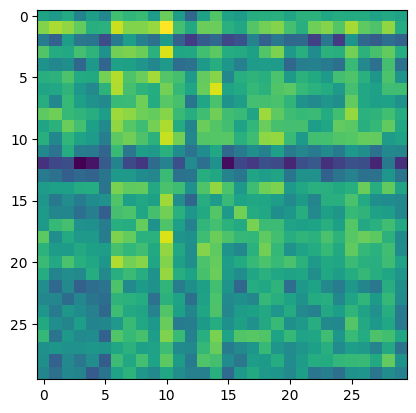

In [ ]:
result = (emb1 @ emb2.T)
result.shape
plt.imshow(result)
plt.show()

In [4]:
import librosa

SR = 16000

def get_whisper_embedding(audio: np.ndarray) -> np.ndarray:
    result = requests.post(
        "http://localhost:8001/v1/models/encoder:predict",
        json={
            "audio": [float(x) for x in audio.tolist()]
        }
    )
    return result.json()["embedding"]


In [14]:
audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)

emb1 = [get_whisper_embedding(audio1[i*SR:(i+10)*SR]) for i in range(1520, 1580, 1)]
emb2 = [get_whisper_embedding(audio2[i*SR:(i+10)*SR]) for i in range(525, 585, 1)]
emb3 = [get_whisper_embedding(audio2[i*SR:(i+10)*SR]) for i in range(760, 820, 1)]

/tmp/ipykernel_437513/1692170043.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_437513/1692170043.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [20]:
emb1 = np.array(emb1)[::,0,...]
emb2 = np.array(emb2)[::,0,...]
emb3 = np.array(emb3)[::,0,...]

(60, 60)


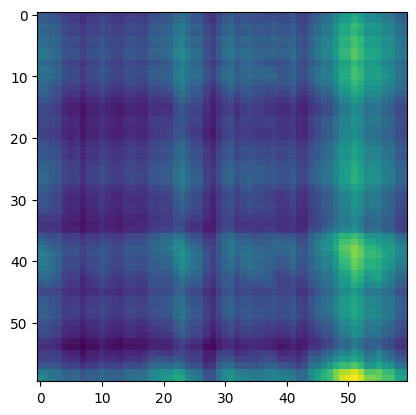

In [25]:
result = (np.array(emb1) @ np.array(emb2).T)
print(result.shape)
plt.imshow(result)
plt.show()

In [67]:
emb1_sex = emb1.reshape(-1, 50, 1280).mean(axis=1)

In [68]:
emb2_sex = emb2.reshape(-1, 50, 1280).mean(axis=1)

In [69]:
import seaborn as sns

In [87]:
emb_1_list = np.array(emb_1_list)
emb_2_list = np.array(emb_2_list)
emb_3_list = np.array(emb_3_list)

In [84]:
emb_1_list.shape

(21, 1280)

In [85]:
emb_2_list.shape

(21, 1280)

In [33]:
from pymilvus import MilvusClient

client = MilvusClient( 
    "http://localhost:19530"
)

result = client.search(
    collection_name="audio_segments_whisper",
    data=[emb1[41].tolist()],
    output_fields=["id", "video_id", "segment_start"],
    limit=200
)[0]

In [34]:
result

[{'id': 450443658880638655,
  'distance': 1.4505834579467773,
  'entity': {'id': 450443658880638655,
   'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4',
   'segment_start': 569}},
 {'id': 450443658880638653,
  'distance': 1.8226383924484253,
  'entity': {'id': 450443658880638653,
   'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4',
   'segment_start': 568}},
 {'id': 450443658880638657,
  'distance': 3.988046407699585,
  'entity': {'id': 450443658880638657,
   'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4',
   'segment_start': 570}},
 {'id': 450443658880734551,
  'distance': 5.7865424156188965,
  'entity': {'id': 450443658880734551,
   'video_id': 'a5e82d6e848953832d839212af0fefd2.mp4',
   'segment_start': 781}},
 {'id': 450443658880712311,
  'distance': 6.223715782165527,
  'entity': {'id': 450443658880712311,
   'video_id': '5ddd14aa6e5928bb215b9ed1b073af91.mp4',
   'segment_start': 1047}},
 {'id': 450443658880734553,
  'distance': 6.272116661071777,
  'entity': {'id': 450443

<Axes: >

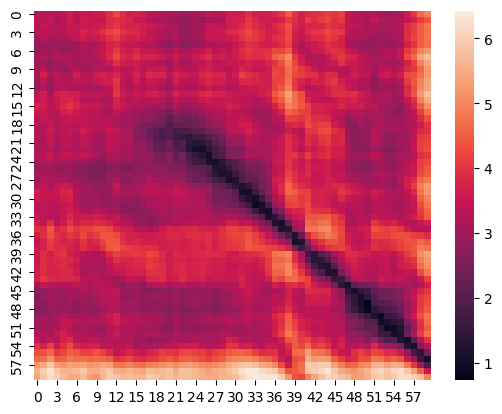

In [35]:
import seaborn as sns

sns.heatmap(
    (emb1[:, None,  :] - emb2[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

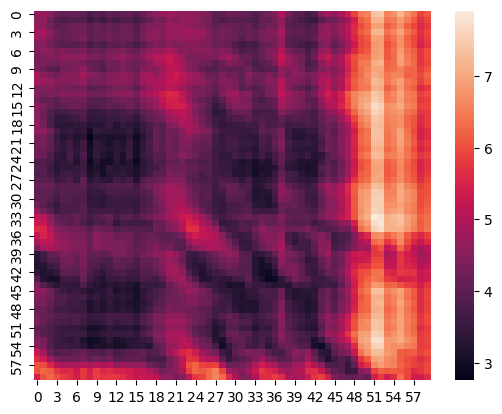

In [28]:
sns.heatmap(
    (emb1[:, None,  :] - emb3[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

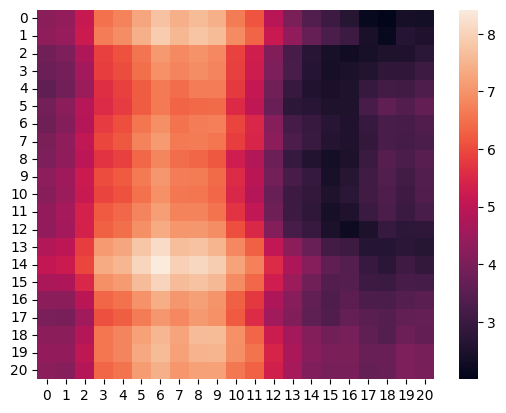

In [83]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_2_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

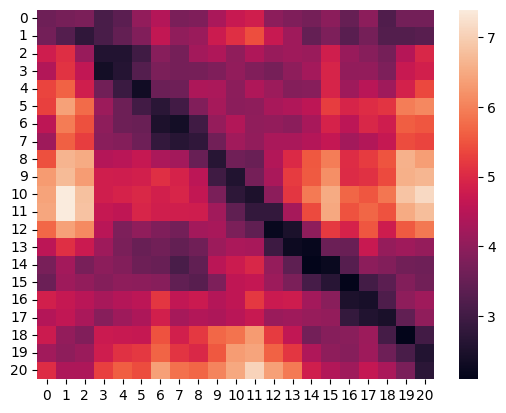

In [89]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_3_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

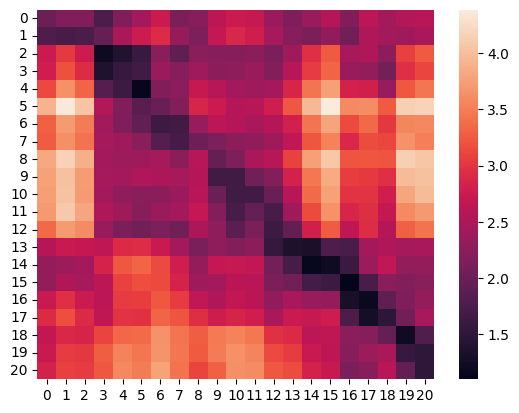

In [82]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_3_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

In [60]:
U, S, Vh = np.linalg.svd(result)

In [62]:
K = 3

In [63]:
RECONSTRUCTED_PACANBECK = (U[:, :K] * S[:K]) @ Vh[:K]

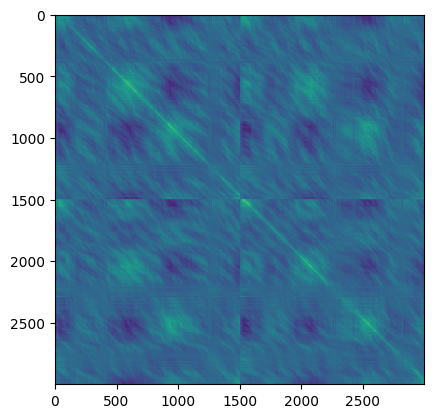

In [64]:
plt.imshow(result - RECONSTRUCTED_PACANBECK)
plt.show()

In [92]:
for i in range(0, 19, 2):
    print(i)

0
2
4
6
8
10
12
14
16
18
